# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import country_converter as coco

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# api.openweathermap.org/data/2.5/box/city?bbox={bbox}&appid={API key}
# bbox required Bounding box [lon-left,lat-bottom,lon-right,lat-top,zoom]
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# minimum 500 cities
len(cities)

#Cities is a list
# cities

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# loop through cities, create list of responseL


# Lists for the dataframe
locations = []
clouds = []
humidity = []
lat = []
lon = []
max_temp = []
wind = []
country = []
dates = []
allcitydata = []

# Initial counter
counter = 0

# Did not used this - for some crazy reason - when using this format, the exception statement will not print
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key +"&units=imperial&q="

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        locations.append(response['name'])
        dates.append(response['dt'])
        allcitydata.append(response)
        counter = counter + 1
        print(f"Counter : {counter}, City : {city}")
    except Exception:
        print("weather data not available")

Counter : 1, City : jamestown
Counter : 2, City : kapaa
Counter : 3, City : fortuna
Counter : 4, City : castro
weather data not available
weather data not available
weather data not available
Counter : 5, City : san cristobal
Counter : 6, City : raahe
weather data not available
Counter : 7, City : nemuro
Counter : 8, City : kabanjahe
Counter : 9, City : nome
Counter : 10, City : butaritari
Counter : 11, City : leningradskiy
Counter : 12, City : rikitea
Counter : 13, City : chauk
Counter : 14, City : khatanga
Counter : 15, City : hami
weather data not available
Counter : 16, City : samarai
Counter : 17, City : bethel
Counter : 18, City : hambantota
Counter : 19, City : mataura
Counter : 20, City : cayenne
Counter : 21, City : waiouru
Counter : 22, City : kaitangata
Counter : 23, City : hermanus
Counter : 24, City : hithadhoo
Counter : 25, City : cabo san lucas
weather data not available
Counter : 26, City : sitka
Counter : 27, City : coquimbo
Counter : 28, City : namibe
Counter : 29, Ci

Counter : 242, City : yambio
Counter : 243, City : alyangula
Counter : 244, City : asyut
Counter : 245, City : zambezi
Counter : 246, City : mabaruma
Counter : 247, City : saint-georges
Counter : 248, City : vestmannaeyjar
Counter : 249, City : souillac
Counter : 250, City : volkhov
Counter : 251, City : oak harbor
Counter : 252, City : baykit
Counter : 253, City : litovko
Counter : 254, City : kununurra
Counter : 255, City : caconda
Counter : 256, City : beringovskiy
Counter : 257, City : george
Counter : 258, City : rezekne
Counter : 259, City : jalu
Counter : 260, City : pevek
Counter : 261, City : lompoc
Counter : 262, City : kachug
Counter : 263, City : acquaviva
Counter : 264, City : evensk
Counter : 265, City : port macquarie
Counter : 266, City : ostrovnoy
Counter : 267, City : araouane
Counter : 268, City : sandwick
Counter : 269, City : bud
Counter : 270, City : stavrovo
Counter : 271, City : sarab
Counter : 272, City : amuntai
weather data not available
Counter : 273, City :

Counter : 488, City : zhigansk
Counter : 489, City : yemtsa
Counter : 490, City : bambanglipuro
Counter : 491, City : tecoanapa
Counter : 492, City : kaspiyskiy
Counter : 493, City : darnah
Counter : 494, City : hualmay
Counter : 495, City : odweyne
Counter : 496, City : carsamba
Counter : 497, City : ambon
weather data not available
Counter : 498, City : xingtai
Counter : 499, City : nizwa
Counter : 500, City : chicama
Counter : 501, City : itapirapua
Counter : 502, City : palmer
Counter : 503, City : dakoro
Counter : 504, City : mackay
Counter : 505, City : vikevag
Counter : 506, City : beroroha
Counter : 507, City : nishihara
Counter : 508, City : chute-aux-outardes
weather data not available
Counter : 509, City : chumikan
Counter : 510, City : mangrol
Counter : 511, City : khorramabad
Counter : 512, City : camacha
Counter : 513, City : bilibino
Counter : 514, City : kieta
Counter : 515, City : sorland
Counter : 516, City : gorontalo
Counter : 517, City : verkhoyansk
Counter : 518, 

In [39]:
# allcitydata
# clouds
# dates
# humidity
# lat
# lon
# max_temp
# wind
# country
# locations

In [34]:
#Convert country abbreviations to full name
full_cnames = coco.convert(names=country, to='name_short')
# full_cnames

In [40]:
# dates.dtype

AttributeError: 'list' object has no attribute 'dtype'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
# Weather data (wd) dataframe

wd_df = pd.DataFrame({"City" : locations, "Country" : full_cnames,
                     "Latitude" : lat, "Longitude" : lon,
                     "Max_temp_F" : max_temp, "Humidity_Percent" : humidity,
                     "Cloudy_Percent" : clouds, "Wind_Speed_mph" : wind,
                      "Date" : dates
                     })
wd_df

,City,Country,Latitude,Longitude,Max_temp_F,Humidity_Percent,Cloudy_Percent,Wind_Speed_mph,Date
0,Jamestown,United States,42.10,-79.24,36.00,86,1,9.17,1607643818
1,Kapaa,United States,22.08,-159.32,82.40,69,1,6.93,1607643859
2,Fortuna,United States,40.60,-124.16,52.00,81,40,1.99,1607643935
3,Castro,Brazil,-24.79,-50.01,61.61,92,20,5.12,1607643758
4,San,Mali,13.30,-4.90,75.13,20,0,10.74,1607643851
...,...,...,...,...,...,...,...,...,...
555,Gautier,United States,30.39,-88.61,62.60,82,1,3.89,1607644060
556,Kangaatsiaq,Greenland,68.31,-53.46,16.79,91,99,10.20,1607644060
557,Cassilândia,Brazil,-19.11,-51.73,75.49,69,94,4.43,1607644060
558,Jaora,India,23.63,75.13,69.17,64,94,2.57,1607644061


In [50]:
wd_df.dtypes

City                        object
Country                     object
Latitude                   float64
Longitude                  float64
Max_temp_F                 float64
Humidity_Percent             int64
Cloudy_Percent               int64
Wind_Speed_mph             float64
Date                datetime64[ns]
dtype: object

In [52]:
# wd_df['Date'] = pd.to_datetime(wd_df['Date'],unit='s')
# wd_df['Date'] = pd.to_datetime(wd_df['Date'],format = "%d/%m/%Y")
wd_df['Date'] = pd.to_datetime(wd_df['Date'])
wd_df['Date'].dt.minute
wd_df

,City,Country,Latitude,Longitude,Max_temp_F,Humidity_Percent,Cloudy_Percent,Wind_Speed_mph,Date
0,Jamestown,United States,42.10,-79.24,36.00,86,1,9.17,2020-12-10 23:43:38
1,Kapaa,United States,22.08,-159.32,82.40,69,1,6.93,2020-12-10 23:44:19
2,Fortuna,United States,40.60,-124.16,52.00,81,40,1.99,2020-12-10 23:45:35
3,Castro,Brazil,-24.79,-50.01,61.61,92,20,5.12,2020-12-10 23:42:38
4,San,Mali,13.30,-4.90,75.13,20,0,10.74,2020-12-10 23:44:11
...,...,...,...,...,...,...,...,...,...
555,Gautier,United States,30.39,-88.61,62.60,82,1,3.89,2020-12-10 23:47:40
556,Kangaatsiaq,Greenland,68.31,-53.46,16.79,91,99,10.20,2020-12-10 23:47:40
557,Cassilândia,Brazil,-19.11,-51.73,75.49,69,94,4.43,2020-12-10 23:47:40
558,Jaora,India,23.63,75.13,69.17,64,94,2.57,2020-12-10 23:47:41


In [53]:
wd_df.dtypes

City                        object
Country                     object
Latitude                   float64
Longitude                  float64
Max_temp_F                 float64
Humidity_Percent             int64
Cloudy_Percent               int64
Wind_Speed_mph             float64
Date                datetime64[ns]
dtype: object

In [54]:
wd_df.to_csv('../output_data/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
# Humidity check

humg100 = (wd_df["Humidity_Percent"] > 100)
humg100

humg100 = humg100.to_frame('Hum>100%')

wdHumg100_df = wd_df.merge(humg100, how = "outer", left_index=True, right_index=True)
wdHumg100_df["Hum>100%"] = wdHumg100_df["Hum>100%"]*1
wdHumg100_df.head()
print(wdHumg100_df.shape)

(560, 10)


In [56]:
#  Get the cities that have humidity over 100%.
wdHumg100_df.loc[wdHumg100_df["Hum>100%"] == 1]

,City,Country,Latitude,Longitude,Max_temp_F,Humidity_Percent,Cloudy_Percent,Wind_Speed_mph,Date,Hum>100%


In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = wdHumg100_df.drop(wdHumg100_df[wdHumg100_df['Hum>100%'] == 1].index, inplace = False)
print(clean_city_data.shape)

(560, 10)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature (1)')

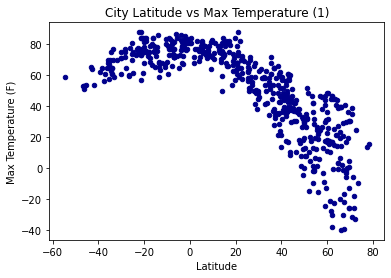

In [96]:
clean_city_data.plot.scatter(x = "Latitude", y = "Max_temp_F", c="DarkBlue")
# day = clean_city_data["Date"].astype(str)
# plt.title ("City Latitude vs. Max Temperature" + (day))
plt.savefig("../Images/scatterLvT.png")
# plt.show()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title (f"City Latitude vs Max Temperature ({day})")

## Latitude vs. Humidity Plot

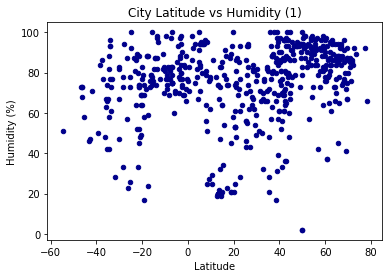

In [99]:
clean_city_data.plot.scatter(x = "Latitude", y = "Humidity_Percent", c="DarkBlue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity ({day})")
plt.savefig("../Images/scatterLvH.png")

## Latitude vs. Cloudiness Plot

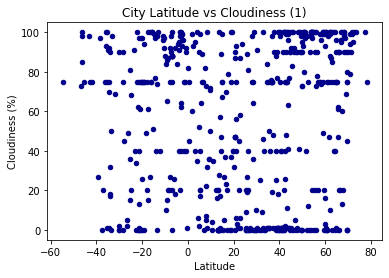

In [100]:
clean_city_data.plot.scatter(x = "Latitude", y = "Cloudy_Percent", c="DarkBlue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs Cloudiness ({day})")
plt.savefig("../Images/scatterLvC.png")

## Latitude vs. Wind Speed Plot

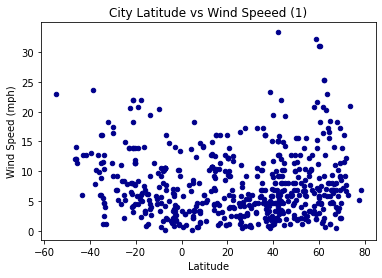

In [101]:
clean_city_data.plot.scatter(x = "Latitude", y = "Wind_Speed_mph", c="DarkBlue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title (f"City Latitude vs Wind Speeed ({day})")
plt.savefig("../Images/scatterLvWS.png")

## Linear Regression

In [76]:
nhclean_city_data = clean_city_data.loc[clean_city_data['Latitude'] >= 0]
shclean_city_data = clean_city_data.loc[clean_city_data['Latitude'] < 0]
# shclean_city_data
print(shclean_city_data.shape)
print(nhclean_city_data.shape)
print(clean_city_data.shape)

(158, 10)
(402, 10)
(560, 10)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

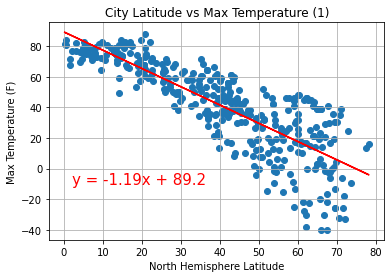

In [105]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Max_temp_F']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("North Hemisphere Latitude")
plt.ylabel("Max Temperature (F)")
plt.title (f"City Latitude vs Max Temperature ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scatternhLvTlr.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

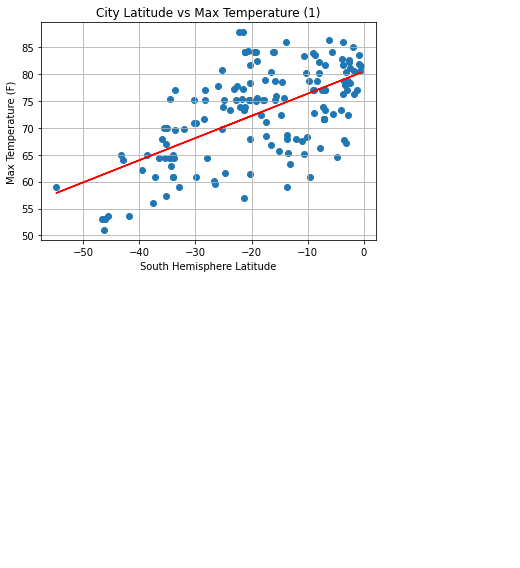

In [108]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Max_temp_F']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("South Hemisphere Latitude")
plt.ylabel("Max Temperature (F)")
plt.title (f"City Latitude vs Max Temperature ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scattershLvTlr.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

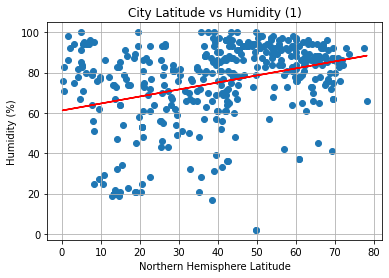

In [109]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Humidity_Percent']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scatternhLvHlr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

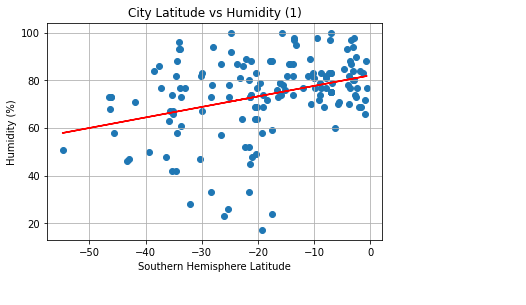

In [110]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Humidity_Percent']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scattershLvHlr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

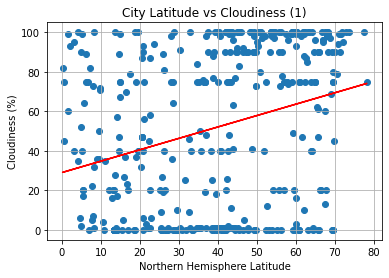

In [112]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Cloudy_Percent']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs Cloudiness ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scatternhLvClr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

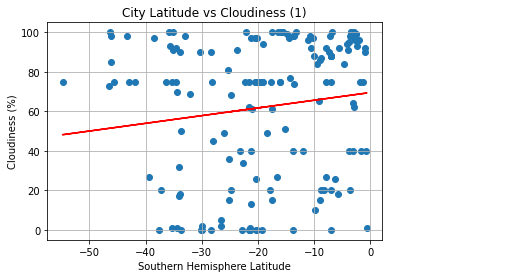

In [113]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Cloudy_Percent']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs Cloudiness ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scattershLvClr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

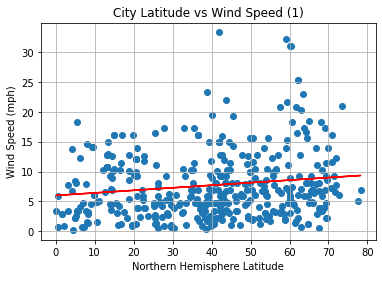

In [114]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Wind_Speed_mph']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title (f"City Latitude vs Wind Speed ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scatternhLvWSlr.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

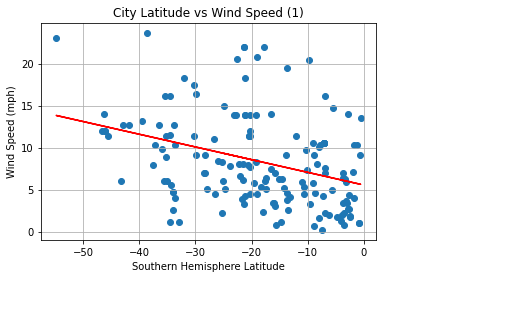

In [115]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Wind_Speed_mph']
#need to grab a single day
# day = nhclean_city_data["Date"]
day = 1

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")

plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title (f"City Latitude vs Wind Speed ({day})")

# plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

# plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/scattershLvWSlr.png")
plt.show()